NAME: ADREETA GUHA USC ID:5122431956

In [240]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [241]:
df=pd.read_csv('hurricane.csv')
df.head()

,Month,Year,Store,County
0,January,2012,NaN,NaN
1,February,2012,NaN,NaN
2,March,2012,NaN,NaN
3,April,2012,NaN,NaN
4,May,2012,NaN,NaN


Q1. (20 pts) Fit a regression model (Month as categorical, no interactions) to estimate the loss of
regular sales (had there been no hurricane) for Carlson Department Store from Sep 2016 to Dec 2016. Plot actual and estimated store sales (in the same chart).

In [242]:
model1 = smf.ols(formula='Store ~ Year+Month',data = df).fit()
df['Store_prediction'] = model1.predict(df)
model1.params

Intercept            -266.312500
Month[T.August]         0.055000
Month[T.December]       2.033333
Month[T.February]      -0.297500
Month[T.January]       -0.130000
Month[T.July]          -0.010000
Month[T.June]          -0.005000
Month[T.March]          0.002500
Month[T.May]            0.215000
Month[T.November]       0.620833
Month[T.October]        0.060833
Month[T.September]     -0.256667
Year                    0.133333
dtype: float64

In [243]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Store   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     52.35
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           1.01e-18
Time:                        16:33:24   Log-Likelihood:                 26.559
No. Observations:                  48   AIC:                            -27.12
Df Residuals:                      35   BIC:                            -2.792
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -266.3125     42.378     -6.284      0.000    -352.345    -180.280
Month[T.August]        0.0550      0.115      0.477      0.636      -0.179       0.289
Month[T.December]      2.0333      0.117     17.360      0.000       1.796       2.271
Month[T.February]     -0.2975      0.115     -2.582      0.014      -0.531      -0.064
Month[T.January]      -0.1300      0.115     -1.128      0.267      -0.364       0.104
Month[T.July]         -0.0100      0.115     -0.087      0.931      -0.244       0.224
Month[T.June]         -0.0050      0.115     -0.043      0.966      -0.239       0.229
Month[T.March]         0.0025      0.115      0.022      0.983      -0.231       0.236
Month[T.May]           0.2150      0.115      1.866      0.070      -0.019       0.449
Month[T.November]      0.6208      0.117      5.301      0.000       0.383       0.859
Month[T.October]       0.0608      0.117      0.519      0.607      -0.177       0.299
Month[T.September]    -0.2567      0.117     -2.191      0.035      -0.494      -0.019
Year                   0.1333      0.021      6.338      0.000       0.091       0.176
==============================================================================
Omnibus:                       13.803   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.633
Skew:                          -0.930   Prob(JB):                     8.99e-05
Kurtosis:                       5.419   Cond. No.                     3.63e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
df['Store_prediction'][:5]

0    1.824167
1    1.656667
2    1.956667
3    1.954167
4    2.169167
Name: Store_prediction, dtype: float64

In [245]:
#estimated loss of regular sales (had there been no hurricane) for Carlson Department Store from Sep 2016 to Dec 2016
df.tail(4)

,Month,Year,Store,County,Store_prediction
56,September,2016,NaN,69.0,2.230833
57,October,2016,NaN,75.0,2.548333
58,November,2016,NaN,85.2,3.108333
59,December,2016,NaN,121.8,4.520833


In [246]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'],format='%Y%B')
df[:5]

,Month,Year,Store,County,Store_prediction,Date
0,January,2012,NaN,NaN,1.824167,2012-01-01
1,February,2012,NaN,NaN,1.656667,2012-02-01
2,March,2012,NaN,NaN,1.956667,2012-03-01
3,April,2012,NaN,NaN,1.954167,2012-04-01
4,May,2012,NaN,NaN,2.169167,2012-05-01


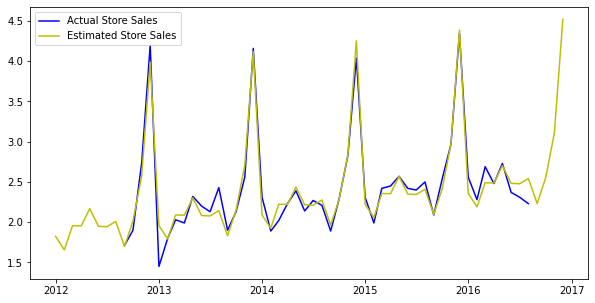

In [247]:
plt.figure(figsize=(10,5))

plt.plot(df['Date'],df['Store'],color='b',label='Actual Store Sales')
plt.plot(df['Date'],df['Store_prediction'],color='y',label='Estimated Store Sales')

plt.legend();

Q2. (20 pts) Split the data into two sets (set 1: 2012 to Aug 2016, and set 2: from Sep 2016 to Dec
2016). Use data set 1 to fit a model for the county sales. Use this model to predict the county
sales from Sep 2016 to Dec 2016. Report these four predictions.

In [248]:
set1=df[:(df.index[df['Date']=='2016-08-01'].tolist()[0]+1)]
set1.head()

,Month,Year,Store,County,Store_prediction,Date
0,January,2012,NaN,NaN,1.824167,2012-01-01
1,February,2012,NaN,NaN,1.656667,2012-02-01
2,March,2012,NaN,NaN,1.956667,2012-03-01
3,April,2012,NaN,NaN,1.954167,2012-04-01
4,May,2012,NaN,NaN,2.169167,2012-05-01


In [249]:
df.index[df['Date']=='2016-08-01'] 

Int64Index([55], dtype='int64')

In [250]:
set2=df[(df.index[df['Date']=='2016-08-01'].tolist()[0]+1):]
set2

,Month,Year,Store,County,Store_prediction,Date
56,September,2016,NaN,69.0,2.230833,2016-09-01
57,October,2016,NaN,75.0,2.548333,2016-10-01
58,November,2016,NaN,85.2,3.108333,2016-11-01
59,December,2016,NaN,121.8,4.520833,2016-12-01


In [251]:
model2 = smf.ols(formula='County ~ Year+Month',data = set1).fit()
model2.params

Intercept             2282.8725
Month[T.August]          4.2000
Month[T.December]       50.4950
Month[T.February]       -8.4000
Month[T.January]       -10.5000
Month[T.July]           -2.1000
Month[T.June]           -1.0500
Month[T.March]           1.8000
Month[T.May]             2.8500
Month[T.November]       11.0450
Month[T.October]        -3.2050
Month[T.September]      -5.3050
Year                    -1.1050
dtype: float64

In [252]:
#predictions for the county sales from Sep 2016 to Dec 2016
set2['County_Predictions']=model2.predict(set2)
set2

<ipython-input-252-a9c64ada5e15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set2['County_Predictions']=model2.predict(set2)


,Month,Year,Store,County,Store_prediction,Date,County_Predictions
56,September,2016,NaN,69.0,2.230833,2016-09-01,49.8875
57,October,2016,NaN,75.0,2.548333,2016-10-01,51.9875
58,November,2016,NaN,85.2,3.108333,2016-11-01,66.2375
59,December,2016,NaN,121.8,4.520833,2016-12-01,105.6875


Q3. (20 pts) Compare your monthly predictions from question 2 with the actual county sales from
Sep 2016 to Dec 2016. Find monthly ratios of actual vs. predicted county sales. Ratios larger
than 1.0 indicate that actual sales were larger than regular sales, most likely, due to hurricane
properties damages.

In [253]:
i=df.index[df['Date']=='2016-08-01'].tolist()[0]+1
i

56

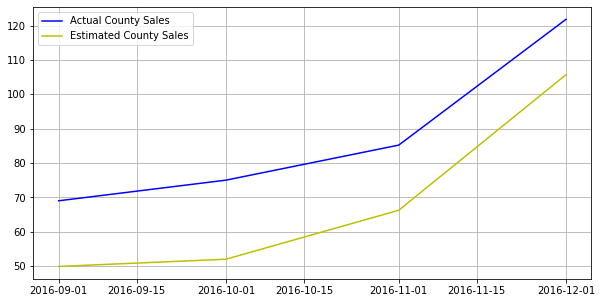

In [266]:
#comparing actual vs predicted county sales from September 2016 to December 2016
plt.figure(figsize=(10,5))
plt.plot(df['Date'][i:],df['County'][i:],color='b',label='Actual County Sales')
plt.plot(df['Date'][i:],set2['County_Predictions'],color='y',label='Estimated County Sales')
plt.grid()
plt.legend()

In [255]:
#Ratios of actual vs predicted county sales from September 2016 to December 2016
Ratios=df['County']/set2['County_Predictions']
Ratios.tail(4)

56    1.383112
57    1.442654
58    1.286280
59    1.152454
dtype: float64

In [256]:
#Ratios of actual vs predicted county sales for all months
df['County_Predictions']=model2.predict(df)
df.head()

,Month,Year,Store,County,Store_prediction,Date,County_Predictions
0,January,2012,NaN,NaN,1.824167,2012-01-01,49.1125
1,February,2012,NaN,NaN,1.656667,2012-02-01,51.2125
2,March,2012,NaN,NaN,1.956667,2012-03-01,61.4125
3,April,2012,NaN,NaN,1.954167,2012-04-01,59.6125
4,May,2012,NaN,NaN,2.169167,2012-05-01,62.4625


Q4. (10 pts) Multiply these ratios by the extimated store sales from question 1. These quantities
are the monthly total sales (regular and hurricane induced) lost by Carlson Store. Report them
along with their sum. It is the amount that Carlson can demand from the insurance company

In [258]:
Lost_Sales=Ratios*df['Store_prediction']
Lost_Sales.tail(4)

56    3.085492
57    3.676365
58    3.998188
59    5.210053
dtype: float64

In [259]:
Compensation=sum(Lost_Sales.tail(4))
Compensation

15.97009842887271

The amount that Carlson can demand from the insurance company is 15.97 million dollars.

Q5. (20 pts) Use data set 1 to compute the fraction of Carlson monthly sales to the county-wide
department stores monthly sales. This is Carlson’s market share. Build a regression model to
predict Carlson’s market share from Sep 2016 to Dec 2016.

In [260]:
df['Share']=df['Store']/df['County']
df[8:12]

,Month,Year,Store,County,Store_prediction,Date,County_Predictions,Share
8,September,2012,1.71,55.8,1.6975,2012-09-01,54.3075,0.030645
9,October,2012,1.90,56.4,2.0150,2012-10-01,56.4075,0.033688
10,November,2012,2.74,71.4,2.5750,2012-11-01,70.6575,0.038375
11,December,2012,4.20,117.6,3.9875,2012-12-01,110.1075,0.035714


In [261]:
model3=smf.ols(formula='Share~Month+Year',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Share   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     5.517
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           3.53e-05
Time:                        16:33:29   Log-Likelihood:                 210.85
No. Observations:                  48   AIC:                            -395.7
Df Residuals:                      35   BIC:                            -371.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.0191      0.911     -6.605      0.000      -7.869      -4.169
Month[T.August]       -0.0020      0.002     -0.793      0.433      -0.007       0.003
Month[T.December]      0.0015      0.003      0.586      0.562      -0.004       0.007
Month[T.February]      0.0007      0.002      0.288      0.775      -0.004       0.006
Month[T.January]       0.0063      0.002      2.528      0.016       0.001       0.011
Month[T.July]          0.0014      0.002      0.552      0.585      -0.004       0.006
Month[T.June]          0.0007      0.002      0.265      0.793      -0.004       0.006
Month[T.March]        -0.0012      0.002     -0.484      0.631      -0.006       0.004
Month[T.May]           0.0017      0.002      0.675      0.504      -0.003       0.007
Month[T.November]      0.0030      0.003      1.189      0.242      -0.002       0.008
Month[T.October]       0.0032      0.003      1.262      0.215      -0.002       0.008
Month[T.September]    -0.0009      0.003     -0.362      0.719      -0.006       0.004
Year                   0.0030      0.000      6.649      0.000       0.002       0.004
==============================================================================
Omnibus:                       17.462   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.831
Skew:                          -1.174   Prob(JB):                     4.06e-06
Kurtosis:                       5.627   Cond. No.                     3.63e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [262]:
df['Share_Prediction']=model3.predict(df)
df[i:]

,Month,Year,Store,County,Store_prediction,Date,County_Predictions,Share,Share_Prediction
56,September,2016,NaN,69.0,2.230833,2016-09-01,49.8875,NaN,0.043939
57,October,2016,NaN,75.0,2.548333,2016-10-01,51.9875,NaN,0.048029
58,November,2016,NaN,85.2,3.108333,2016-11-01,66.2375,NaN,0.047847
59,December,2016,NaN,121.8,4.520833,2016-12-01,105.6875,NaN,0.046326


Q6. (10 pts) Multiply Carlson’s predicted market shares by the actual county department store sales
month by month. These are the monthly total sales (regular and hurricane induced) lost by
Carlson Store. Report them along with their sum. It is the amount that Carlson can demand
from the insurance company.

In [263]:
Monthly_Total_Shares=df['Share_Prediction'][i:]*df['County'][i:]
Monthly_Total_Shares

56    3.031775
57    3.602180
58    4.076529
59    5.642558
dtype: float64

In [264]:
sum(Monthly_Total_Shares)

16.353041384069638

The amount that Carlson can demand from the insurance company is 16.35 million dollars.